In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

## sdでUSBAudioを設定

In [48]:
devices = sd.query_devices()
devices

   0 Microsoft サウンド マッパー - Input, MME (2 in, 0 out)
>  1 ライン (USB AUDIO  CODEC), MME (2 in, 0 out)
   2 ジャックマイク (Realtek(R) Audio), MME (2 in, 0 out)
   3 Microsoft サウンド マッパー - Output, MME (0 in, 2 out)
<  4 スピーカー (USB AUDIO  CODEC), MME (0 in, 2 out)
   5 PL2493H (NVIDIA High Definition, MME (0 in, 2 out)
   6 スピーカー (Realtek(R) Audio), MME (0 in, 2 out)
   7 PL2493H (NVIDIA High Definition, MME (0 in, 2 out)
   8 ヘッドフォン (Realtek(R) Audio), MME (0 in, 2 out)
   9 プライマリ サウンド キャプチャ ドライバー, Windows DirectSound (2 in, 0 out)
  10 ライン (USB AUDIO  CODEC), Windows DirectSound (2 in, 0 out)
  11 ジャックマイク (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 プライマリ サウンド ドライバー, Windows DirectSound (0 in, 2 out)
  13 スピーカー (USB AUDIO  CODEC), Windows DirectSound (0 in, 2 out)
  14 PL2493H (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  15 スピーカー (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  16 PL2493H (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)

In [49]:
devices = sd.query_devices()
for i, device in enumerate(devices):
    if 'ライン' in device['name'] and device['hostapi'] == 0:
        INPUT = i
SAMPLING_RATE = 48000
NUM_CHANNELS = 2 # チャンネル数(1にしたら基本的にLchのみになる)
# CH = 1 # Rchを指定
DTYPE = 'int16'
BLOCK_SIZE = 2048
EU = 0.0006103515625

# sd.default.device = [INPUT, None]
sd.default.samplerate = SAMPLING_RATE
sd.default.channels = NUM_CHANNELS
sd.default.dtype = DTYPE
sd.default.blocksize = BLOCK_SIZE
print(devices)

   0 Microsoft サウンド マッパー - Input, MME (2 in, 0 out)
>  1 ライン (USB AUDIO  CODEC), MME (2 in, 0 out)
   2 ジャックマイク (Realtek(R) Audio), MME (2 in, 0 out)
   3 Microsoft サウンド マッパー - Output, MME (0 in, 2 out)
<  4 スピーカー (USB AUDIO  CODEC), MME (0 in, 2 out)
   5 PL2493H (NVIDIA High Definition, MME (0 in, 2 out)
   6 スピーカー (Realtek(R) Audio), MME (0 in, 2 out)
   7 PL2493H (NVIDIA High Definition, MME (0 in, 2 out)
   8 ヘッドフォン (Realtek(R) Audio), MME (0 in, 2 out)
   9 プライマリ サウンド キャプチャ ドライバー, Windows DirectSound (2 in, 0 out)
  10 ライン (USB AUDIO  CODEC), Windows DirectSound (2 in, 0 out)
  11 ジャックマイク (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
  12 プライマリ サウンド ドライバー, Windows DirectSound (0 in, 2 out)
  13 スピーカー (USB AUDIO  CODEC), Windows DirectSound (0 in, 2 out)
  14 PL2493H (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)
  15 スピーカー (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  16 PL2493H (NVIDIA High Definition Audio), Windows DirectSound (0 in, 2 out)

raw_data.shape:(144000, 2)


[Text(0.5, 0, 'Time[s]'),
 Text(0, 0.5, 'Amplitude[Pa?]'),
 Text(0.5, 1.0, 'Calibrated data [R channel] (float64)')]

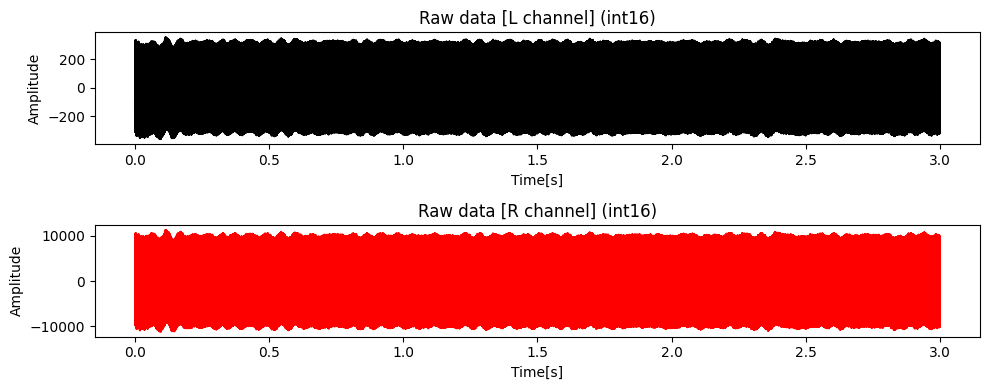

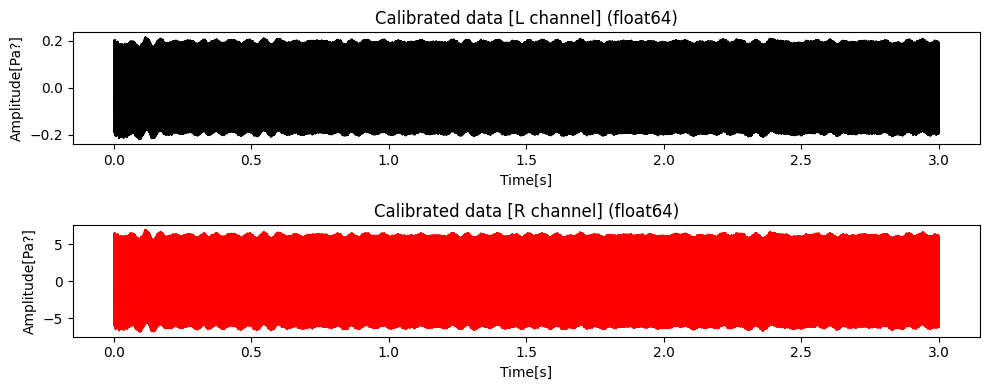

In [50]:
time = 3
samples = int(time * SAMPLING_RATE)

raw_data = sd.rec(samples)
sd.wait()
print(f'raw_data.shape:{raw_data.shape}')

L = raw_data[:,0]
R = raw_data[:,1]

t = np.arange(raw_data.shape[0])/SAMPLING_RATE
eu_data = raw_data * EU

fig,ax = plt.subplots(2,1,figsize=(10,4),tight_layout=True)
ax[0].plot(t,L,color='k')
ax[0].set(xlabel='Time[s]',ylabel='Amplitude',title=f'Raw data [L channel] ({raw_data.dtype})')

ax[1].plot(t,R,color='r')
ax[1].set(xlabel='Time[s]',ylabel='Amplitude',title=f'Raw data [R channel] ({raw_data.dtype})')


fig,ax = plt.subplots(2,1,figsize=(10,4),tight_layout=True)
ax[0].plot(t,L*EU,color='k')
ax[0].set(xlabel='Time[s]',ylabel='Amplitude[Pa?]',title=f'Calibrated data [L channel] ({(L*EU).dtype})')

ax[1].plot(t,R*EU,color='r')
ax[1].set(xlabel='Time[s]',ylabel='Amplitude[Pa?]',title=f'Calibrated data [R channel] ({(R*EU).dtype})')

🤔EU値が違うんだろうな。

黒い箱型のUSBAudioは114dBMAX。それでEU値を求めていた。

新しい筒形のUSBマイク（長いのも短いのも）は、Rchが104dBがmax、Lchが134dBがmax。

In [51]:
L_pa_max = 20*10**(-6)*10**(134/20)
R_pa_max = 20*10**(-6)*10**(104/20)
L_EU = (L_pa_max*2)/2**(16)
R_EU = (R_pa_max*2)/2**(16)

raw_data.shape:(144000, 2)


[(-1.1, 1.1)]

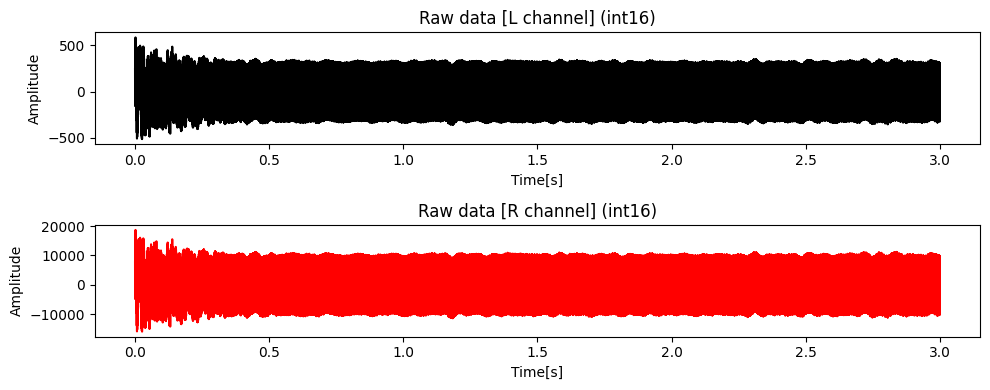

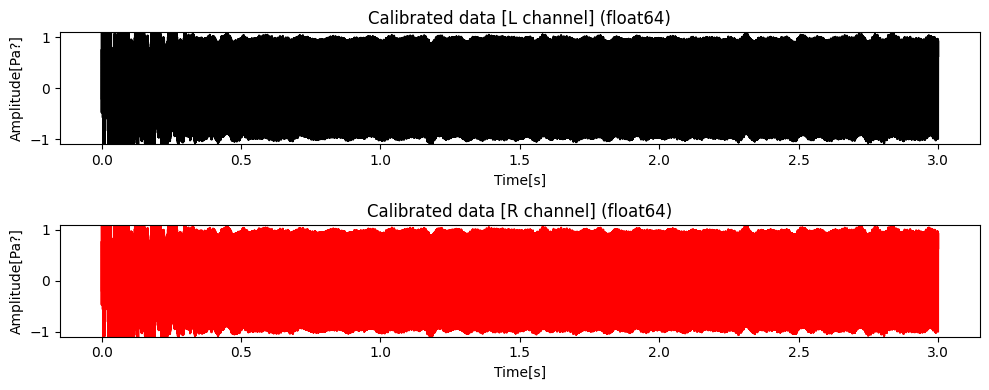

In [53]:
time = 3
samples = int(time * SAMPLING_RATE)

raw_data = sd.rec(samples)
sd.wait()
print(f'raw_data.shape:{raw_data.shape}')

L = raw_data[:,0]
R = raw_data[:,1]

L_calibrated = L*L_EU
R_calibrated = R*R_EU

t = np.arange(raw_data.shape[0])/SAMPLING_RATE


fig,ax = plt.subplots(2,1,figsize=(10,4),tight_layout=True)
ax[0].plot(t,L,color='k')
ax[0].set(xlabel='Time[s]',ylabel='Amplitude',title=f'Raw data [L channel] ({raw_data.dtype})')

ax[1].plot(t,R,color='r')
ax[1].set(xlabel='Time[s]',ylabel='Amplitude',title=f'Raw data [R channel] ({raw_data.dtype})')


fig,ax = plt.subplots(2,1,figsize=(10,4),tight_layout=True)
ax[0].plot(t,L_calibrated,color='k')
ax[0].set(xlabel='Time[s]',ylabel='Amplitude[Pa?]',title=f'Calibrated data [L channel] ({(L_calibrated).dtype})')
ax[0].set(ylim=[-1.1,1.1])

ax[1].plot(t,R_calibrated,color='r')
ax[1].set(xlabel='Time[s]',ylabel='Amplitude[Pa?]',title=f'Calibrated data [R channel] ({(R_calibrated).dtype})')
ax[1].set(ylim=[-1.1,1.1])